# Assignment:

>         ANOVA

## Submitted by:

>         M.Mohsin ur Rehman Khan
>         email:mohsinrehman677@gmail.com
>         Ph # +923048827042
>         Mianwali,Punjab,Pakistan

## Submitted to:

>         Dr. Muhammad Ammar Tufail

        **Date:(03/31/2022)**   

# Parametric Tests to analyze the variance

# 1. Analysis of Variance (ANOVA) 

>   An "Analysis of Variance" (ANOVA) tests three or more groups for mean differences based on a continuous
> 
>   (i.e. scale or interval) response variable (a.k.a. dependent variable). 


  **Types:**


>  (1) "one-way"
> 
>  (2) "two-way"

In [1]:
#Importing libraries
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats

In [2]:
#Loading dataset
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.sample(15)   #To take random 15 samples

,total_bill,tip,sex,smoker,day,time,size
28,21.70,4.30,Male,No,Sat,Dinner,2
158,13.39,2.61,Female,No,Sun,Dinner,2
88,24.71,5.85,Male,No,Thur,Lunch,2
183,23.17,6.50,Male,Yes,Sun,Dinner,4
19,20.65,3.35,Male,No,Sat,Dinner,3
56,38.01,3.00,Male,Yes,Sat,Dinner,4
173,31.85,3.18,Male,Yes,Sun,Dinner,2
21,20.29,2.75,Female,No,Sat,Dinner,2
106,20.49,4.06,Male,Yes,Sat,Dinner,2
160,21.50,3.50,Male,No,Sun,Dinner,4


In [4]:
# to check niqueness
df["day"].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

<AxesSubplot:xlabel='day', ylabel='tip'>

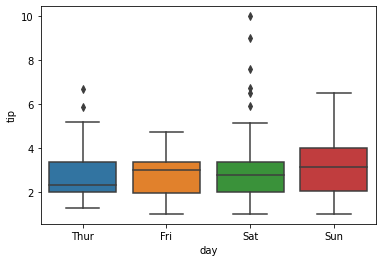

In [5]:
#boxplot
sns.boxplot(x="day",y="tip",data=df)

In [6]:
# As we have one factor variable(species) with 3 groups and one target variable
# so 1-way ANOVA is the right option to choose
import statsmodels.api as sm
from statsmodels.formula.api import ols

#fitting model
model=ols("tip ~ day", data=df).fit()

#Applying Anova
anov_table=sm.stats.anova_lm(model,type=2)
print(anov_table)

             df      sum_sq   mean_sq         F    PR(>F)
day         3.0    9.525873  3.175291  1.672355  0.173589
Residual  240.0  455.686604  1.898694       NaN       NaN


# Assignment
# Type
When data is unbalanced, there are different ways to calculate the sums of squares for ANOVA.

There are at least 3 approaches, commonly called Type I, II and III sums of squares.

> 1.Type I, also called “sequential” sum of squares
> 
> 2.Type II,This type tests for each main effect after the other main effect.Note that no significant interaction is assumed.
> 
> 3.Type III,This type tests for the presence of a main effect after the other main effect and interaction. This approach is 
> 
> therefore valid in the presence of significant interactions.

In [7]:
# pairwise comparison e.d here b/w 2 species

paired_ttest=model.t_test_pairwise("day", method="bonferroni")
paired_ttest.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-bonferroni,reject-bonferroni
Fri-Thur,-0.036715,0.361324,-0.101612,0.919150,-0.748487,0.675057,1.000000,False
Sat-Thur,0.221652,0.229016,0.967846,0.334096,-0.229486,0.672789,1.000000,False
Sun-Thur,0.483680,0.235811,2.051132,0.041340,0.019156,0.948204,0.248039,False
Sat-Fri,0.258367,0.348935,0.740444,0.459754,-0.428999,0.945732,1.000000,False
Sun-Fri,0.520395,0.353432,1.472405,0.142222,-0.175830,1.216619,0.853331,False
Sun-Sat,0.262028,0.216349,1.211136,0.227034,-0.164157,0.688214,1.000000,False


# Assignment 

In [21]:
# sidak
paired_ttest=model.t_test_pairwise("day", method="sidak")
paired_ttest.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-sidak,reject-sidak
Fri-Thur,-0.036715,0.361324,-0.101612,0.919150,-0.748487,0.675057,1.000000,False
Sat-Thur,0.221652,0.229016,0.967846,0.334096,-0.229486,0.672789,0.912809,False
Sun-Thur,0.483680,0.235811,2.051132,0.041340,0.019156,0.948204,0.223775,False
Sat-Fri,0.258367,0.348935,0.740444,0.459754,-0.428999,0.945732,0.975137,False
Sun-Fri,0.520395,0.353432,1.472405,0.142222,-0.175830,1.216619,0.601664,False
Sun-Sat,0.262028,0.216349,1.211136,0.227034,-0.164157,0.688214,0.786715,False


In [8]:
# tukey hsd test
import pingouin as pg

anov_table1=pg.anova(data=df, dv="tip",between="day",detailed=True)
print(anov_table1)

   Source          SS   DF        MS         F     p-unc       np2
0     day    9.525873    3  3.175291  1.672355  0.173589  0.020476
1  Within  455.686604  240  1.898694       NaN       NaN       NaN


In [9]:
# Tukey test pairwise
pt=pg.pairwise_tukey(data=df, dv="tip",between="day")
print(pt)


      A     B   mean(A)   mean(B)      diff        se         T   p-tukey  \
0   Sun   Sat  3.255132  2.993103  0.262028  0.216349  1.211136  0.620382   
1   Sun  Thur  3.255132  2.771452  0.483680  0.235811  2.051132  0.172421   
2   Sun   Fri  3.255132  2.734737  0.520395  0.353432  1.472405  0.455805   
3   Sat  Thur  2.993103  2.771452  0.221652  0.229016  0.967846  0.767858   
4   Sat   Fri  2.993103  2.734737  0.258367  0.348935  0.740444  0.880645   
5  Thur   Fri  2.771452  2.734737  0.036715  0.361324  0.101612  0.999623   

     hedges  
0  0.189273  
1  0.349080  
2  0.374610  
3  0.160036  
4  0.186148  
5  0.026391  


# Tukey test visualization in boxplot

In [15]:
pip install statannot

Note: you may need to restart the kernel to use updated packages.


In [17]:
from statannot import add_stat_annotation

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Thur v.s. Fri: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=6.305e+02
Thur v.s. Sat: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.407e-01 U_stat=2.180e+03
Sun v.s. Fri: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.041e-02 U_stat=9.605e+02


(<AxesSubplot:xlabel='day', ylabel='total_bill'>,
  <statannot.StatResult.StatResult at 0x1c79c0a5fc0>])

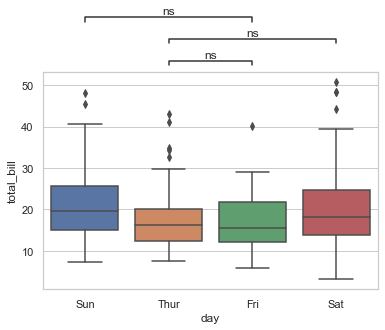

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

sns.set(style="whitegrid")
df = sns.load_dataset("tips")

x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

# Test to visualize this way
* t-test_ind
* t-test_welch
* t-test_paired
* Mann-Whitney
* Mann-Whitney-gt
* Mann-Whitney-ls
* Levene,
* Wilcoxon
* Kruskal


## Still finding to visualize Tukey hsd test in boxplot in Python